<a href="https://colab.research.google.com/github/AleynaKapusuz/Covid_Healty_individual/blob/main/image_classification_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 Görüntü Sınıflandırma


## Ortam Hazırlığı

In [ ]:
# Drive ' a Bağlanma
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd # Bulunduğum konumu gösterir

'/content'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification

/content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification


In [ ]:
%pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


## Prediction (Sınıflandırma)


In [ ]:
# Resim sınıflandırma / Test / ImageNet

In [ ]:
!yolo classify predict model=yolov8l-cls.pt source="https://www.southernliving.com/thmb/Rz-dYEhwq_82C5_Y9GLH2ZlEoYw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg" save=True

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients, 99.7 GFLOPs

Found https://www.southernliving.com/thmb/Rz-dYEhwq_82C5_Y9GLH2ZlEoYw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg locally at gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg: 224x224 golden_retriever 0.99, Newfoundland 0.00, Brittany_spaniel 0.00, Tibetan_terrier 0.00, flat-coated_retriever 0.00, 288.2ms
Speed: 37.4ms preprocess, 288.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


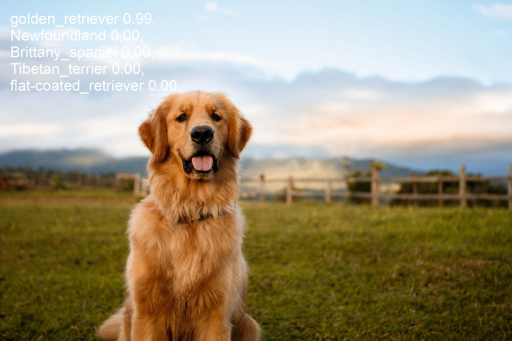

In [ ]:
# Sonuçlar
import imutils
import cv2
from google.colab.patches import cv2_imshow # colab te imshow çalışmadığı için bunu eklemek zorundayım

img_path = "/content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/runs/classify/predict/prediction_1.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=512)
cv2_imshow(img)

In [ ]:
# Verileri erişme

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img_path = "runs/classify/predict/prediction_1.jpg"
model_path = "yolov8l-cls.pt"

model = YOLO(model_path) # Modeli yükle
results = model(img_path) # Resmi yükle ve sınıflandır # Aldığım çıktıyı depolama


image 1/1 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/runs/classify/predict/prediction_1.jpg: 224x224 golden_retriever 0.99, Newfoundland 0.00, Brittany_spaniel 0.00, Tibetan_terrier 0.00, Labrador_retriever 0.00, 265.0ms
Speed: 23.7ms preprocess, 265.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
class_dict = results[0].names
probs = results[0].probs.data.tolist() # Amaç : olasılıklara erişmek

print("Sınıflar: ", class_dict)
print("Olasılıklar: ", probs)
print("Sonuç: ", class_dict[np.argmax(probs)]) # en büyük değere sahip olan index i buldu

Sınıflar:  {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake'

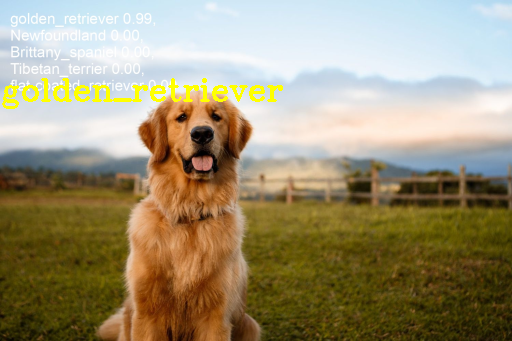

In [ ]:
text = class_dict[np.argmax(probs)]
text_position = (1,100)

cv2.putText(img, text, text_position, cv2.FONT_HERSHEY_COMPLEX, fontScale= 1, color=(0,255, 255), thickness=2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## TRAİNİNG

In [ ]:
# Dosya ayıklama
!unzip data/covid_classification.zip -d ./data

In [ ]:
# Eğitim
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolo8_classication"

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/covid_classification, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolo8_classication3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
# Eğer eğitim yarıda kesilirse eğitimin kaldığı yerden devam etmesi için :
!yolo classify train model=runs/classify/yolo8_classication3/weights/last.pt resume=True

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=runs/classify/yolo8_classication3/weights/last.pt, data=data/covid_classification, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolo8_classication3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/classify/yolo8_classication3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

## COVID Prediction (Sınıflandırma)


In [ ]:
# Resim sınıflandırma
# Amaç : inference a gidicek deteciton yapıcak ve kaydedicek
!yolo classify predict model=runs/classify/yolo8_classication3/weights/best.pt source=inference save=True

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

image 1/12 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-12.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.7ms
image 2/12 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-38.png: 224x224 covid 0.53, normal 0.47, viral_pneumonia 0.00, 10.8ms
image 3/12 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-49.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.8ms
image 4/12 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-68.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.7ms
image 5/12 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/Normal-919.png: 224x224 normal 1.00, viral_pneumonia 0.00, covid 0.00, 10.7ms
imag

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-49.png"
model_path = "runs/classify/yolo8_classication3/weights/best.pt"

model = YOLO(model_path) # Modeli yükle
results = model(img_path) # Resmi yükle ve sınıflandır # Aldığım çıktıyı depolama


image 1/1 /content/drive/MyDrive/Colab Notebooks/YOLOv8/image_classification/inference/COVID-49.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.2ms
Speed: 8.8ms preprocess, 11.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
class_dict = results[0].names
probs = results[0].probs.data.tolist() # Amaç : olasılıklara erişmek

print("Sınıflar: ", class_dict)
print("Olasılıklar: ", probs)
print("Sonuç: ", class_dict[np.argmax(probs)]) # en büyük değere sahip olan index i buldu

Sınıflar:  {0: 'covid', 1: 'normal', 2: 'viral_pneumonia'}
Olasılıklar:  [0.9999877214431763, 1.1477303814899642e-05, 8.78027378803381e-07]
Sonuç:  covid


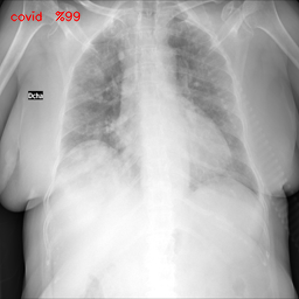

In [ ]:
name = class_dict[np.argmax(probs)]
max_prob = int( np.max(probs) *100 )

text = name +" "+" %" + str(max_prob)

img = cv2.imread(img_path)
cv2.putText(img, text, (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,250), 1, cv2.LINE_AA ) # img, text, coodinat, font, fontScale, color, thickness, fontType

cv2_imshow(img)